In [6]:
import sys
import xarray as xr
import matplotlib.pyplot as plt

sys.path.append('../')

In [5]:
from SwotDiag.diagnosis import *

### Standard SWOT product (2 km, L3)

In [7]:
file = '../Samples/SWOT_L3_LR_SSH_Expert_006_532_20231121T123734_20231121T132901_v0.3_SMST_FOCUS.nc'
SWOT = xr.open_dataset(file)

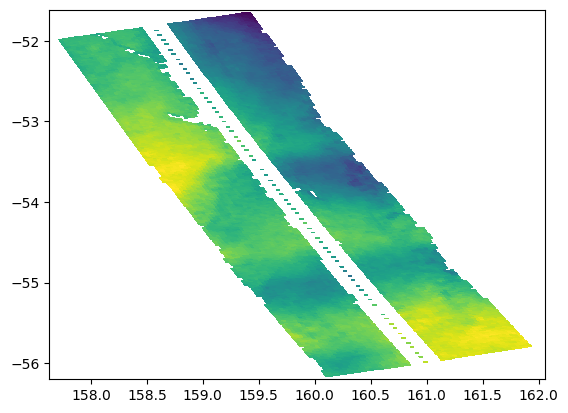

In [9]:
plt.pcolormesh(SWOT.longitude, SWOT.latitude, SWOT.ssha)

### Standard SSHA (not noiseless)

In [21]:
### Classical central point difference (stencil 5 points)
ug, vg = compute_geostrophic_velocities(SWOT.ssha, SWOT.longitude, SWOT.latitude, derivative = 'dxdy', n = 5)
Ug_dxdy = np.sqrt(ug**2 + vg**2)

### Slope fitting on 5*5 points 2D kernel
ug, vg = compute_geostrophic_velocities(SWOT.ssha, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 5)
Ug_fit_5 = np.sqrt(ug**2 + vg**2)

### Slope fitting on 9*9 points 2D kernel
ug, vg = compute_geostrophic_velocities(SWOT.ssha, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 9)
Ug_fit_9 = np.sqrt(ug**2 + vg**2)

100%|████████████████████████████████████████| 246/246 [00:01<00:00, 148.99it/s]


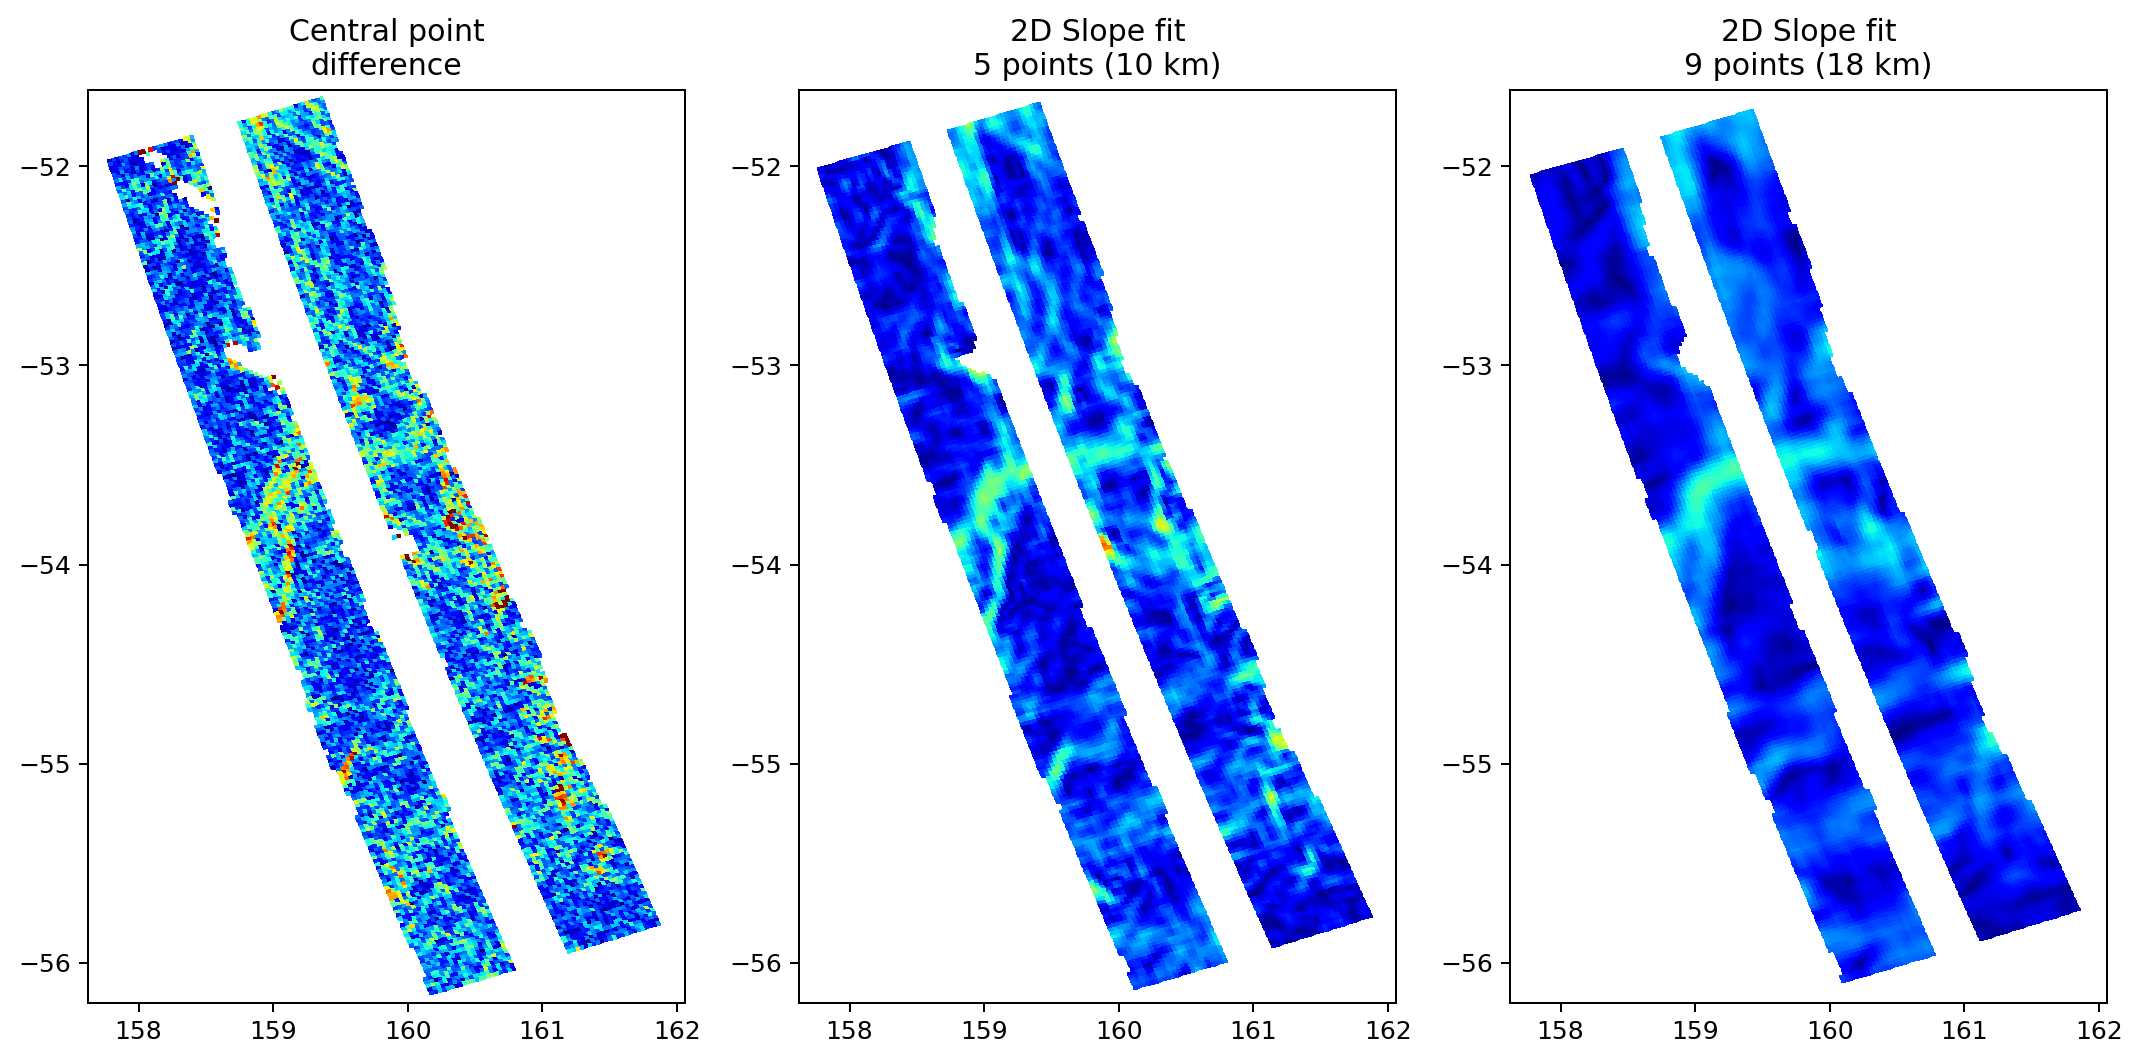

In [23]:
clim = (0, 1.5)
plt.figure(figsize = (12, 6), dpi = 180)

plt.subplot(131)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, Ug_dxdy, cmap = 'jet')
plt.clim(clim)
plt.title('Central point\ndifference')

plt.subplot(132)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, Ug_fit_5, cmap = 'jet')
plt.clim(clim)
plt.title('2D Slope fit\n5 points (10 km)')

plt.subplot(133)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, Ug_fit_9, cmap = 'jet')
plt.clim(clim)
plt.title('2D Slope fit\n9 points (18 km)')

plt.tight_layout()

#### Noiseless SSHA

In [24]:
### Classical central point difference (stencil 5 points)
ug, vg = compute_geostrophic_velocities(SWOT.ssha_noiseless, SWOT.longitude, SWOT.latitude, derivative = 'dxdy', n = 5)
Ug_dxdy = np.sqrt(ug**2 + vg**2)

### Slope fitting on 5*5 points 2D kernel
ug, vg = compute_geostrophic_velocities(SWOT.ssha_noiseless, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 5)
Ug_fit_5 = np.sqrt(ug**2 + vg**2)

### Slope fitting on 9*9 points 2D kernel
ug, vg = compute_geostrophic_velocities(SWOT.ssha_noiseless, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 9)
Ug_fit_9 = np.sqrt(ug**2 + vg**2)

100%|████████████████████████████████████████| 246/246 [00:00<00:00, 291.30it/s]


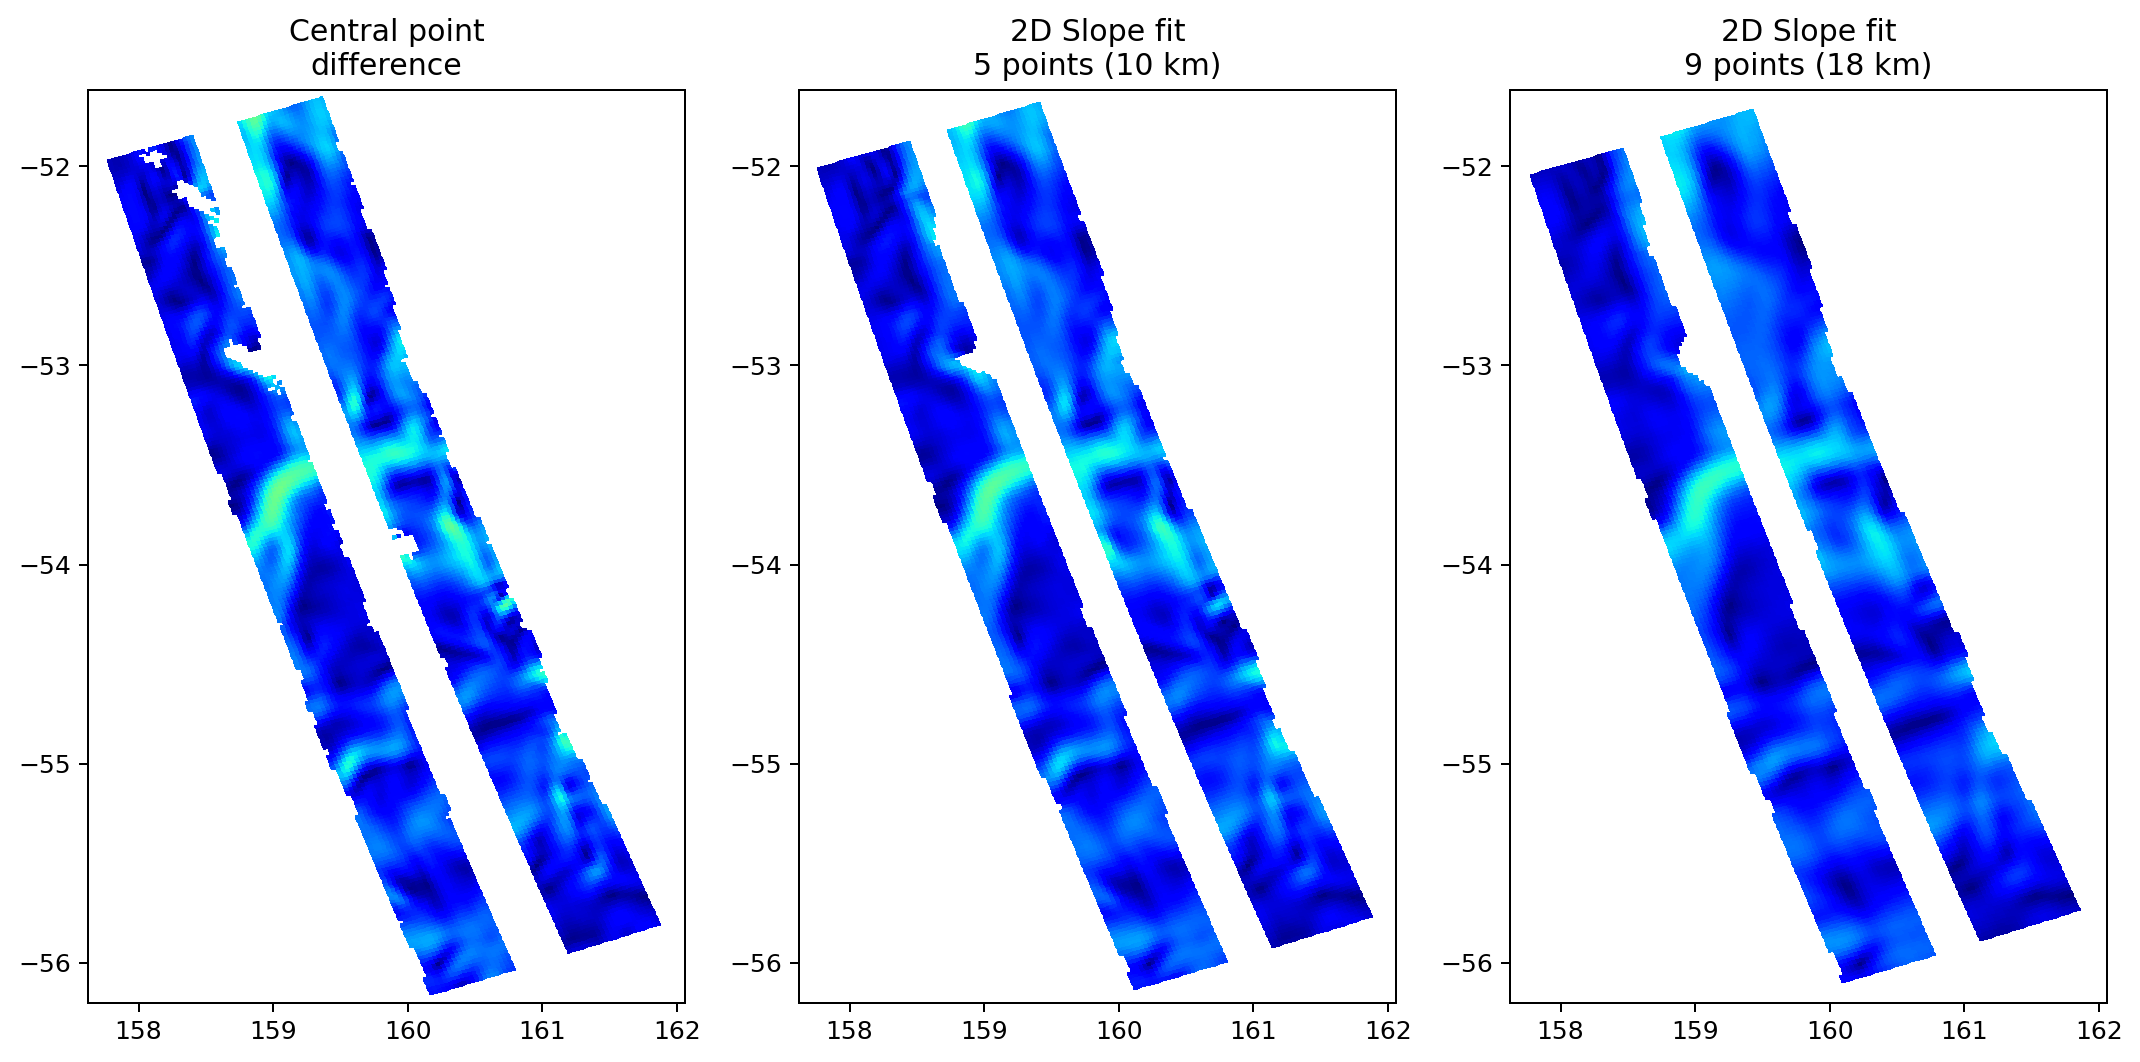

In [25]:
clim = (0, 1.5)
plt.figure(figsize = (12, 6), dpi = 180)

plt.subplot(131)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, Ug_dxdy, cmap = 'jet')
plt.clim(clim)
plt.title('Central point\ndifference')

plt.subplot(132)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, Ug_fit_5, cmap = 'jet')
plt.clim(clim)
plt.title('2D Slope fit\n5 points (10 km)')

plt.subplot(133)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, Ug_fit_9, cmap = 'jet')
plt.clim(clim)
plt.title('2D Slope fit\n9 points (18 km)')

plt.tight_layout()